In [1]:
import pandas as pd 
import numpy as np 

import os

import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns 
import missingno as msno 
from utils import my_histogram, make_stacked_table, my_stacked_barplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_train = pd.read_csv("../data/df_train.csv")
df_test = pd.read_csv("../data/df_test.csv")

- There are 4 demographic variables.
    - Age: Years (100 for patients 90 or above)
    - Gender: Female (0) or Male (1)
    - Unit1: Administrative identifier for ICU unit (MICU)
    - Unit2: Administrative identifier for ICU unit (SICU)

# 1. Age

In [5]:
df_train.Age.isna().sum()

11592

In [6]:
df_test.Age.isna().sum()

5008

- There are 11,592, 5008 missing values in the Age variable from the train and the test data.
- If the ID is same, then the Age should be same. So let's fill the missing age with the known age value from differnet row of the same ID.

In [7]:
df_train["Age"] = df_train.groupby("ID")["Age"].transform(lambda v: v.ffill())
df_train["Age"] = df_train.groupby("ID")["Age"].transform(lambda v: v.bfill())

df_test["Age"] = df_test.groupby("ID")["Age"].transform(lambda v: v.ffill())
df_test["Age"] = df_test.groupby("ID")["Age"].transform(lambda v: v.bfill())


In [8]:
df_train.Age.isna().sum()

0

In [9]:
df_test.Age.isna().sum()

0

In [10]:
grouped_age = pd.DataFrame(df_train.groupby("ID").mean().Age)
grouped_age.columns = ["Age"]

grouped_age.describe()


,Age
count,15144.000000
mean,61.615115
std,16.435411
min,13.770000
25%,51.190000
50%,63.325000
75%,73.970000
max,100.990000


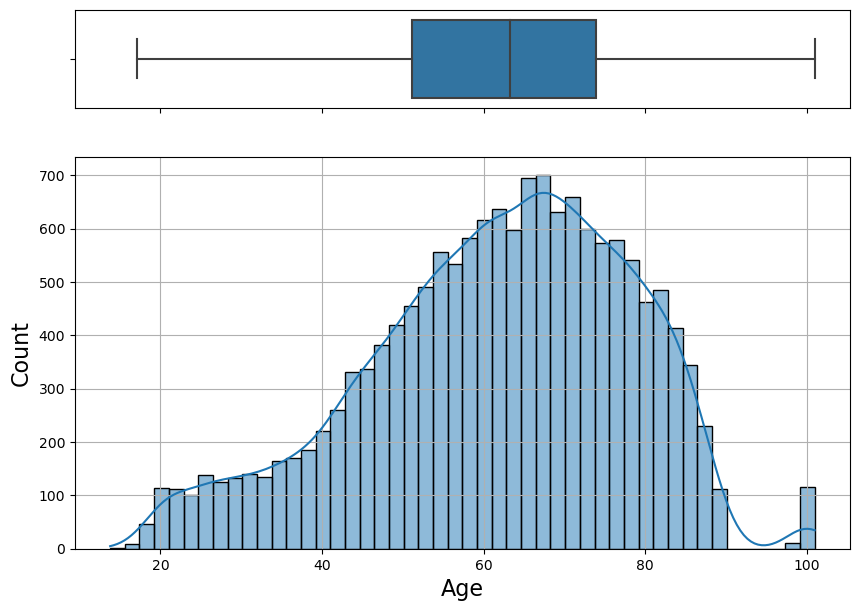

In [11]:
my_histogram(grouped_age, "Age")

- Minimum age is 13 and maximum age is 100. 
- Mean age is 61, median age is 63.
- Age distribution is slightly left-skewed.

### Q. Does the age distribution differ according to outcome?

<AxesSubplot:xlabel='Age', ylabel='Count'>

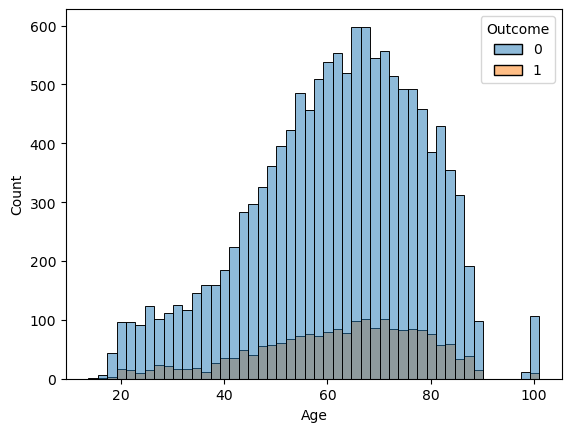

In [13]:
sns.histplot(data = df_train[["ID", "Age", "Outcome"]].drop_duplicates(), 
             x = "Age", hue = "Outcome")

- It seems that outcome = 1 group and outcome = 0 group have the similar age distribution.

# 2. Gender

In [14]:
df_train.Gender.isna().sum()

11592

In [15]:
df_test.Gender.isna().sum()

5008

- There are 11,592, 5,008 missing values in the Gender variable from the train and the test data.
- If the ID is same, then the Gender should be same. So let's fill the missing gender with the known gender value from differnet row of the same ID.

In [16]:
df_train["Gender"] = df_train.groupby("ID")["Gender"].transform(lambda v: v.ffill())
df_train["Gender"] = df_train.groupby("ID")["Gender"].transform(lambda v: v.bfill())

df_test["Gender"] = df_test.groupby("ID")["Gender"].transform(lambda v: v.ffill())
df_test["Gender"] = df_test.groupby("ID")["Gender"].transform(lambda v: v.bfill())

In [17]:
df_train.Gender.isna().sum()

0

In [18]:
df_test.Gender.isna().sum()

0

<AxesSubplot:xlabel='Gender', ylabel='count'>

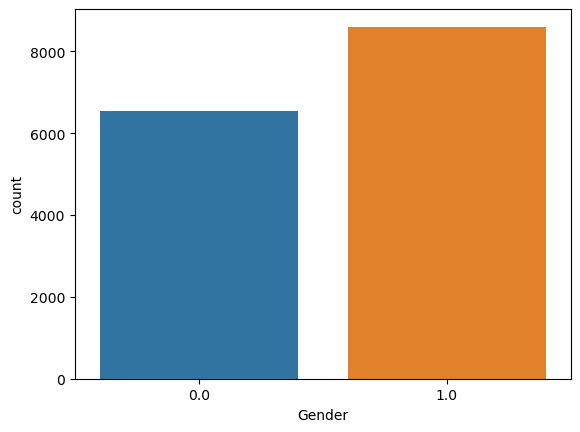

In [19]:
sns.countplot(x = df_train[["ID", "Gender"]].drop_duplicates().Gender)

- There are about 2,000 more males than females.

### Q. Is there a relationship between gender and outcomes?

In [20]:
temp = make_stacked_table(df_train[["ID", "Gender", "Outcome"]].drop_duplicates(), "Gender", "Outcome", "ID")
temp

,Gender,0,1,total,ratio
0,1.0,7357,1248,14714,0.08
1,0.0,5722,817,11444,0.07


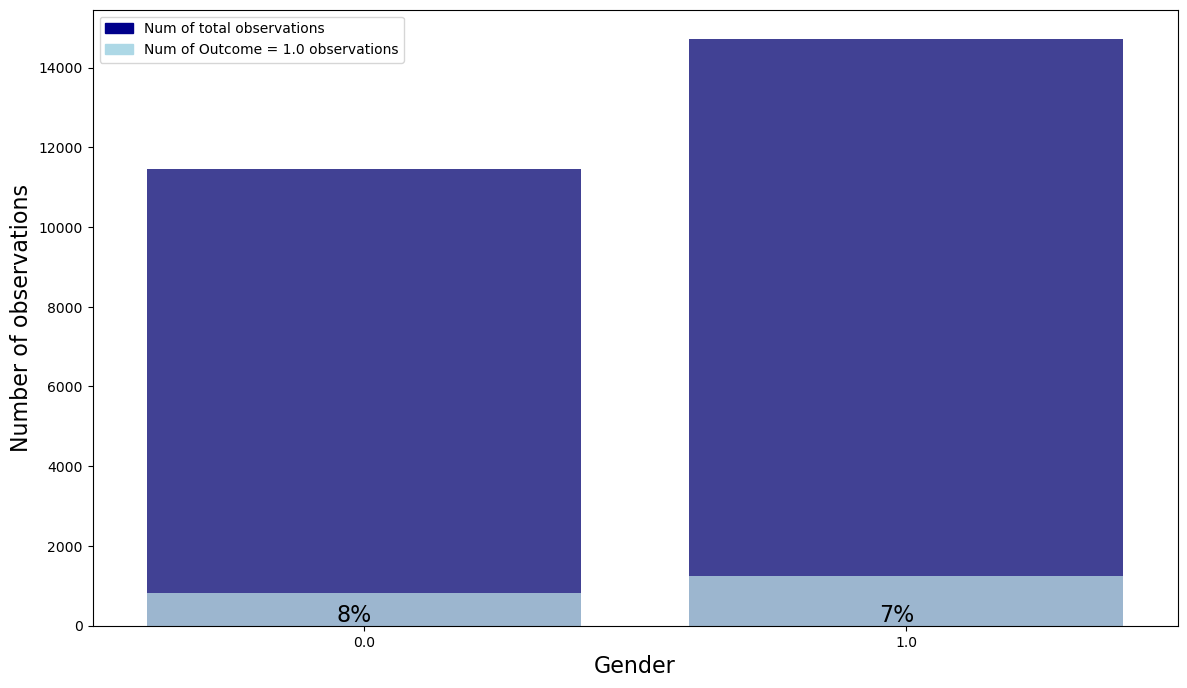

In [21]:
my_stacked_barplot(temp, "Gender", "Outcome", 1.0)

- Regardless of gender, there are about 8% of sepsis patients in each gender.
- It seems that gender is not related to the outcome.

# 3. Unit1, Unit2

In [26]:
df_train.Unit1.unique()

array([nan,  0.,  1.])

- Unit1 variables means wheter the patient has stayed in MICU
- Unit2 variables means wheter the patient has stayed in SICU

In [35]:
(df_train.Unit1 + df_train.Unit2).unique()

array([nan,  1.])

- The sum of unit1 and unit2 is 1.
- That is, all patients stayed in either unit1 or unit2.

In [36]:
np.sum(df_train[["ID", "Unit1"]].drop_duplicates().dropna().groupby(["ID"]).count() != 1)

Unit1    0
dtype: int64

In [37]:
np.sum(df_train[["ID", "Unit2"]].drop_duplicates().dropna().groupby(["ID"]).count() != 1)

Unit2    0
dtype: int64

- Each patient has unique Unit1 and Unit2 value.
- SO, if the ID is same, then the Unit1 and the Unit2 should be same. So let's fill the missing Unit with the known Unit value from differnet row of the same ID.

In [39]:
# Impute the missing values from the Unit1 variable

df_train["Unit1"] = df_train.groupby("ID")["Unit1"].transform(lambda v: v.ffill())
df_train["Unit1"] = df_train.groupby("ID")["Unit1"].transform(lambda v: v.bfill())

df_test["Unit1"] = df_test.groupby("ID")["Unit1"].transform(lambda v: v.ffill())
df_test["Unit1"] = df_test.groupby("ID")["Unit1"].transform(lambda v: v.bfill())

# Impute the missing values from the Unit2 variable
df_train["Unit2"] = df_train.groupby("ID")["Unit2"].transform(lambda v: v.ffill())
df_train["Unit2"] = df_train.groupby("ID")["Unit2"].transform(lambda v: v.bfill())

df_test["Unit2"] = df_test.groupby("ID")["Unit2"].transform(lambda v: v.ffill())
df_test["Unit2"] = df_test.groupby("ID")["Unit2"].transform(lambda v: v.bfill())

In [51]:
len(df_train[df_train.Unit1.isna()].ID.unique())

5883

In [52]:
len(df_train[df_train.Unit2.isna()].ID.unique())

5883

In [54]:
len(df_train[(df_train.Unit1.isna() & df_train.Unit2.isna())].ID.unique())

5883

- 5,883 patiens out of the total 15,144 patiens have missing values ​​in both unit1 and unit2.

Text(0.5, 1.0, 'Unit2')

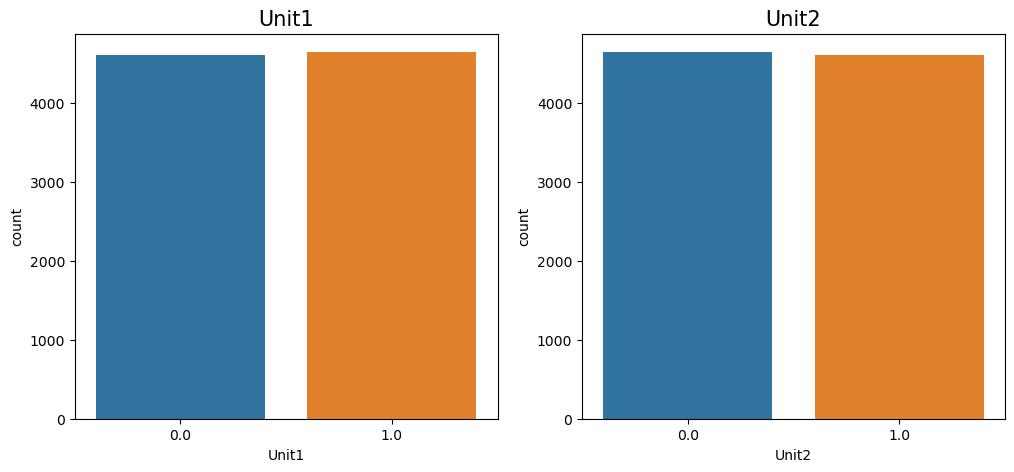

In [44]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = df_train[["ID", "Unit1"]].drop_duplicates().Unit1, ax = axes[0])
axes[0].set_title("Unit1", fontsize = 15)

sns.countplot(x = df_train[["ID", "Unit2"]].drop_duplicates().Unit2, ax = axes[1])
axes[1].set_title("Unit2", fontsize = 15)

- Unit1 and Unit2 are evenly distributed.

### Q. Is there a relationship between unit and outcomes?

In [45]:
temp = make_stacked_table(df_train[["ID", "Unit1", "Outcome"]].drop_duplicates(), "Unit1", "Outcome", "ID")
temp

,Unit1,0,1,total,ratio
0,0.0,4158,454,8316,0.05
1,1.0,3998,651,7996,0.08


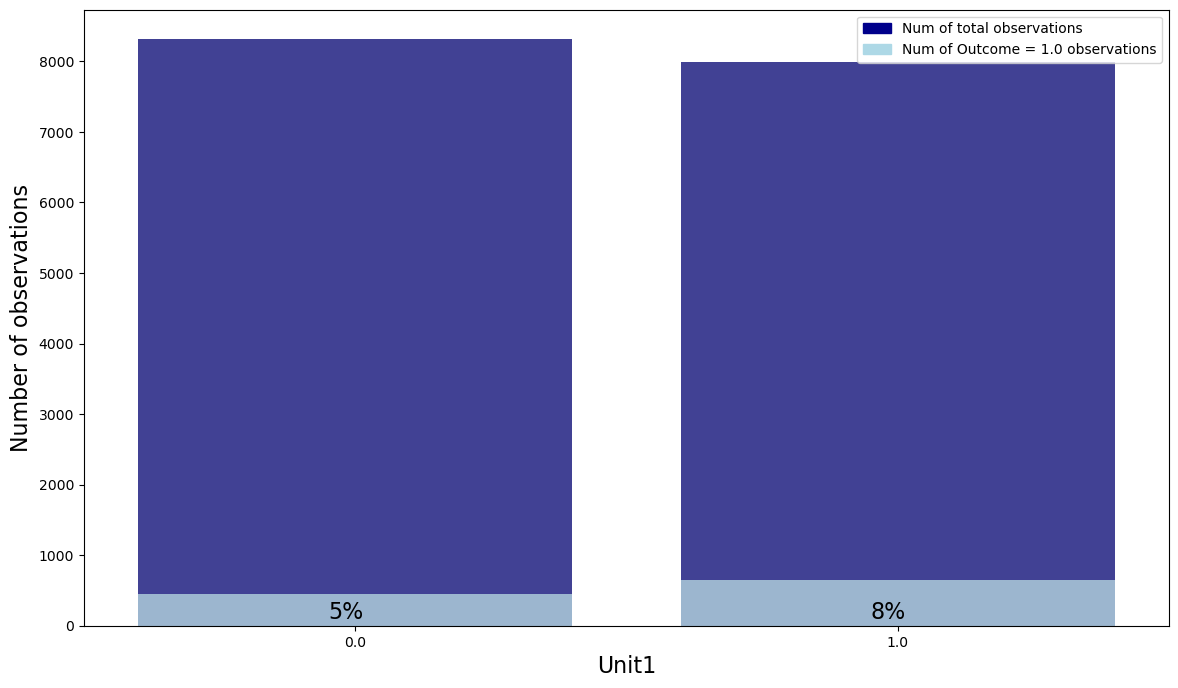

In [46]:
my_stacked_barplot(temp, "Unit1", "Outcome", 1.0)

- About 8% of patients staying in unit 1 and about 5% of patients staying in unit 2 had sepsis.
- However, for about 38% of patients, information on which unit they stayed was not available.
- So, let's exclude the Unit1 and the Unit2 variables from the analysis.

In [56]:
df_train = df_train.drop("Unit1", axis = 1)
df_train = df_train.drop("Unit2", axis = 1)

df_test = df_test.drop("Unit1", axis = 1)
df_test = df_test.drop("Unit2", axis = 1)

- Save the modified tables.

In [ ]:
df_train.to_csv("../data/df_train.csv", index = False)
df_test.to_csv("../data/df_test.csv", index = False)

- Save the each ID's distinct demographic variables (age and gender) into table.

In [59]:
df_train_demo = df_train[["ID", "Age", "Gender"]].drop_duplicates()
df_test_demo = df_test[["ID", "Age", "Gender"]].drop_duplicates()

- Save the tables.

In [60]:
df_train_demo.to_csv("../data/df_train_demo.csv", index = False)
df_test_demo.to_csv("../data/df_test_demo.csv", index = False)

In [61]:
df_train_demo.dtypes

ID          int64
Age       float64
Gender    float64
dtype: object

# 4. Summary  

![4.summary](../images/df_demo.png)